<a href="https://colab.research.google.com/github/Devananda2027/Crushathon/blob/main/Audio_Enhancement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.12/dist-packages/pydub/utils.py:300: SyntaxWarning: invalid escape sequence '\('
  m = re.match('([su]([0-9]{1,2})p?) \(([0-9]{1,2}) bit\)$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:301: SyntaxWarning: invalid escape sequence '\('
  m2 = re.match('([su]([0-9]{1,2})p?)( \(default\))?$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:310: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(flt)p?( \(default\))?$', token):
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:314: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(dbl)p?( \(default\))?$', token):


Saving Voice 250926_095110-1.m4a to Voice 250926_095110-1.m4a


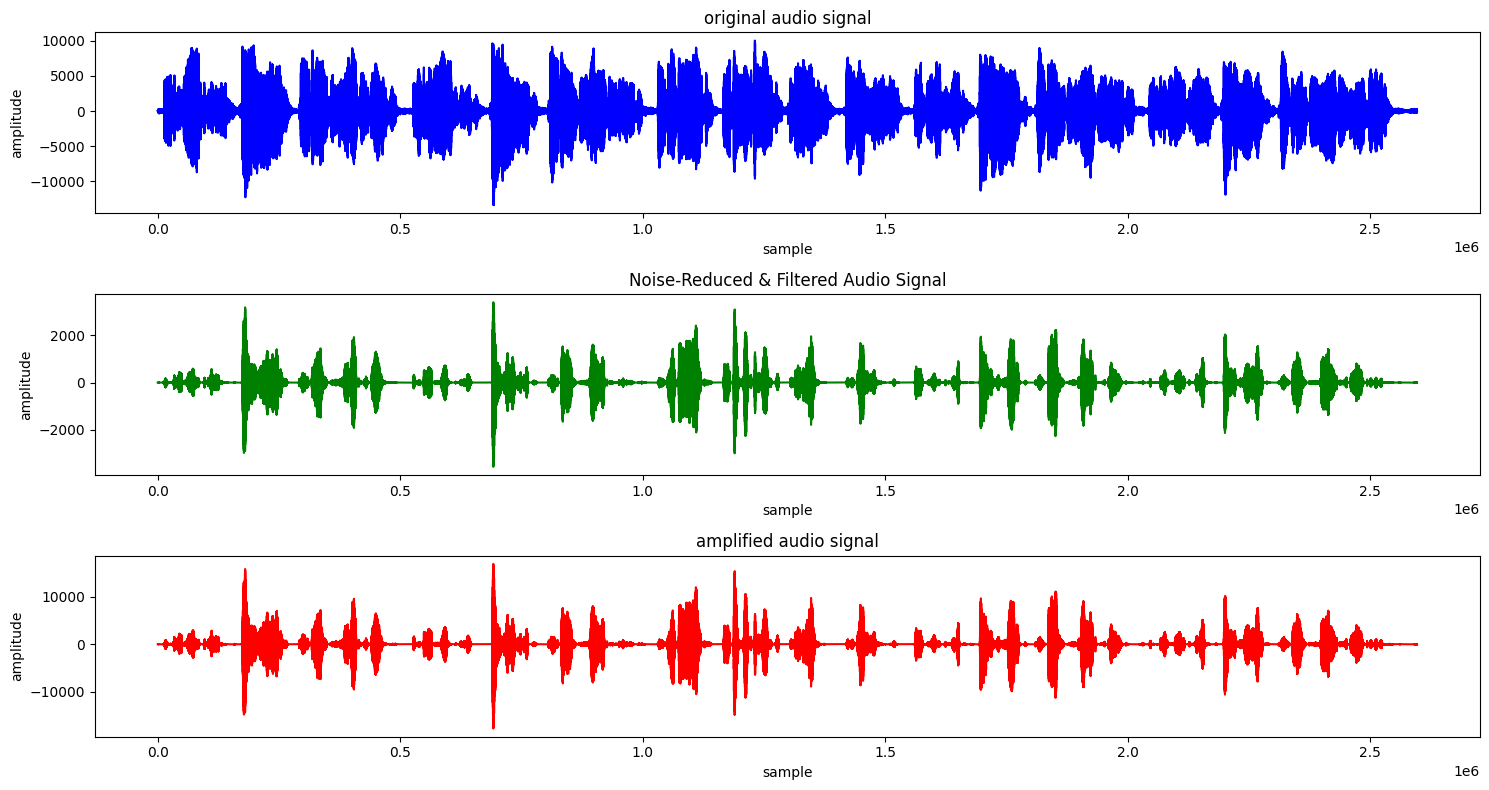

In [2]:
# libraries
!pip install pydub noisereduce scipy matplotlib
import noisereduce as nr
from pydub import AudioSegment
from scipy.io import wavfile
import numpy as np
import io
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter
from google.colab import files
uploaded = files.upload()


def butter_bandpass(lowcut, highcut,fs,order=5):
  nyq = 0.5*fs
  low = lowcut/nyq
  high = highcut/nyq
  b, a = butter(order, [low, high], btype='band')
  return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
  b, a = butter_bandpass(lowcut, highcut, fs, order=order)
  y= lfilter(b, a, data)
  return y

filename = list(uploaded.keys())[0]
audio = AudioSegment.from_file(io.BytesIO(uploaded[filename]))


audio = audio.set_channels(1)
audio.export("temp.wav", format="wav")
rate, data= wavfile.read("temp.wav")

reduced_noise = nr.reduce_noise(y=data, sr=rate)

lowcut = 500.0
highcut = 3000.0
filtered_audio = butter_bandpass_filter(reduced_noise, lowcut, highcut, rate, order=6)

amplification_factor = 5
amplified_audio = filtered_audio * amplification_factor

amplified_audio = np.clip(amplified_audio, -32768, 32768)
amplified_audio = amplified_audio.astype(np.int16)
plt.figure(figsize = (15,8))

plt.subplot(3,1,1)
plt.plot(data, color='blue' )
plt.title("original audio signal")
plt.xlabel('sample')
plt.ylabel('amplitude')

plt.subplot(3,1,2)
plt.plot(filtered_audio, color='green' )
plt.title("Noise-Reduced & Filtered Audio Signal")
plt.xlabel('sample')
plt.ylabel('amplitude')


plt.subplot(3,1,3)
plt.plot(amplified_audio, color='red' )
plt.title("amplified audio signal")
plt.xlabel('sample')
plt.ylabel('amplitude')


plt.tight_layout()
plt.show()





